# <span style="color:green"> Numerical Simulation Laboratory (NSL) Exercise 8 Results </span>


We consider the following potential and trial wave function:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.

## 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \int dx p(x) E_{loc.} (x) 
$$

which can be used to find the parameters that minimize this quantity.

We've evaluated the integral results and try to identify the best value for $\mu,\sigma$, the various methods to minimize and results are presented below.

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)
import numpy as np
import subprocess
from scipy.optimize import minimize
import os
import re

nsteps = 1000
step = 1
nblocks = 100

path_old = os.path.join(os.getcwd(), "QMC_1D")
path = './8'

First we've tried a minimization procedure with a python script but with vague results. 

(The range around 0.8 and 0.6 turn out to be exact but we've not the sufficient accuracy to identify the exact value)

In [15]:
# a = [mu, sigma]
def Hmean(a):
    return float(subprocess.run([f"{path}/main", str(a[0]), str(a[1]), str(nsteps), str(step),  str(nblocks)], capture_output=True).stdout)

mu, sigma = minimize(Hmean, [0.8,0.6], method='CG', jac='2-point', options={'gtol': 1e-6, 'eps': 1e-2, 'disp': True}).x #, bounds=((0.6, 0.9), (0.5, 0.8)))
# mu, sigma = minimize(Hmean, [0.8,0.6], method='Nelder-Mead', options={'xatol': 1e-6, 'fatol': 1e-6, 'adaptive': True, 'disp': True}).x #, bounds=((0.6, 1.2), (0.4, 0.8)))
# mu, sigma = minimize(Hmean, [0.8,0.6], method='BFGS', jac='2-point', options={'gtol': 1e-6, 'eps': 1e-3, 'disp': True}).x #, bounds=((0.6, 1.2), (0.4, 0.8)))
print(mu, sigma)

         Current function value: -0.449116
         Iterations: 2
         Function evaluations: 313
         Gradient evaluations: 75
0.7890455266517711 0.6449288743113739


In [16]:
# a = [mu, sigma]
def Hmean(a):
    return float(subprocess.run([f"{path}/main", '0.87', str(a), str(nsteps), str(step), str(nblocks)], capture_output=True).stdout)

from scipy.optimize import minimize_scalar
minimize_scalar(Hmean, method='Golden', bounds=(0, 1))

     fun: -0.438965
    nfev: 44
     nit: 39
 success: True
       x: 0.6369124117597369

Then we've decided to plot our result in a range to estimate the minimum for different  $\mu,\sigma$, our idea was to hepl the minimization procedure with boundaries. (The plot should allow interaction and should be movable, this feature has been lost in the last chek)

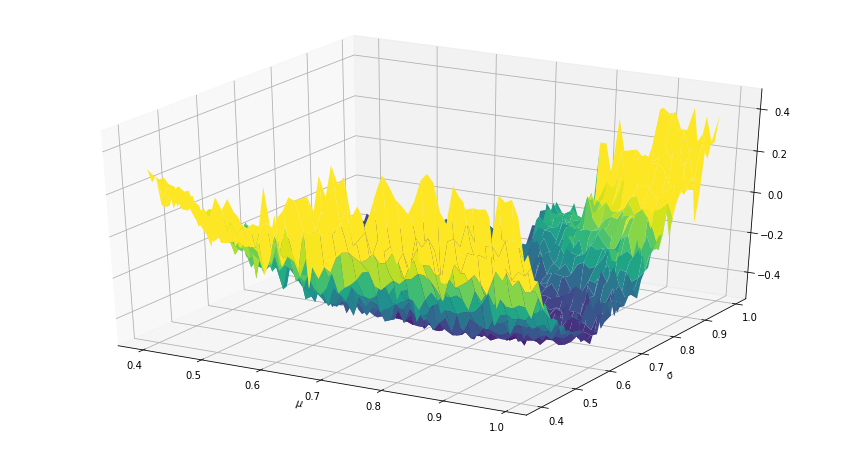

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget
def Hmean(mu, sigma):
    return float(subprocess.run([f"{path}/main", str(mu), str(sigma), str(nsteps), str(step), str(nblocks)], capture_output=True).stdout)

x = np.arange(0.4, 1.0, 0.01)
y = np.arange(0.4, 1.0, 0.01)
# x = np.arange(0.6, 0.9, 0.01)
# y = np.arange(0.55, 0.8, 0.01)
xx, yy = np.meshgrid(x, y)#, sparse=True)
zz = np.vectorize(Hmean)(xx,yy)
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', vmax=0)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
plt.show()

As the plot show the minimum is ine the range between 0.6 and 1.0 for $\mu$ and for $\sigma$ between 0.6 and 0.8, serch the plot minimum give as result:

In [242]:
np.argmin(zz)
np.min(zz)
#mu = 0.8233760242869834
#sigma = 0.6001036360445634

-0.488813

The minimum turn out to be at -0.488813, for $\mu = 0.823$, $\sigma = 0.6$ that is strange as we expect the exact.

## 08.2

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below).

In the following plot we show the results for our code with block extimation, we've use 100 blocks each with $1\times10^3$ steps.

A confront between,  $|\Psi_0(x)|^2$</span> and  $|\Psi_T(x)|^2$</span> result are presented below, as can be seen our result are near the best result but are not the same, this is not what we expected, infact with the Variational Monte Carlo Tecnique, as said our result should be exact and mach the desired one, the same should be for the probability function with parameters best set.

Our result is a consequence of our limited extimation of the minimum value.

In [40]:
# c&p from suppl. material
plt.rcParams['figure.figsize'] = (15,5)
def plot(MU, SIGMA):
    plt.figure(figsize=(15,8))
    mu = MU
    sigma = SIGMA

    subprocess.run(["./main", str(mu), str(sigma), str(nsteps), str(step), str(nblocks), 'verbose_pdf'], cwd=path)
    psi, psi_err = np.loadtxt(f'{path}/output.dat', unpack=True)
    x = np.arange(len(psi))
    #plt.figure(figsize=(15,7))
    plt.errorbar(x, psi, yerr = psi_err)
    plt.xlabel('# blocks')
    plt.ylabel(r'$\left\langle \hat{H} \right\rangle_T$')
    plt.grid(True)
    plt.show()
    
def psi2_neo(x):
    Vpot = lambda x: (x**2 - 2.5)*x**2

    hbar = 1
    m = 1
    dx = x[1] - x[0]
    N = x.size

    CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
    H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(Vpot(x))
    # Compute eigenvectors and their eigenvalues
    E,psi = np.linalg.eigh(H)
    # Take the transpose & normalize
    psi = np.transpose(psi)
    psi = psi/np.sqrt(dx)
    return psi[0]**2

def psi2_thor(x):
    # theoretical psi2 (brutally normalized)
    y = (np.exp(-(x-mu)**2/(2*sigma**2)) + np.exp(-(x+mu)**2/(2*sigma**2)))**2
    dx = x[1] - x[0]
    y /= np.sum(y*dx)
    return y
def function():
    x = np.loadtxt(f'{path}/x_hist_pdf.dat')
    _, bins, _ = plt.hist(x, density=True, bins=500, alpha=0.5);
    plt.plot(bins,psi2_neo(bins))
    plt.plot(bins,psi2_thor(bins), 'b')
    

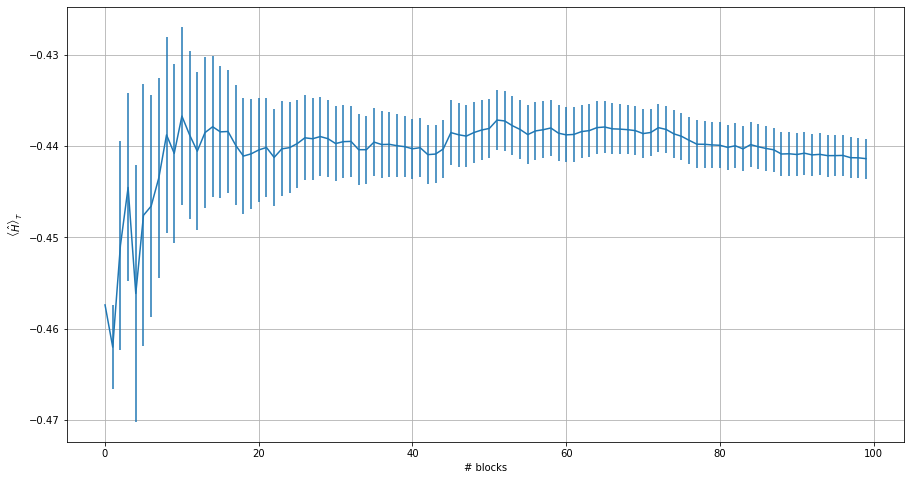

In [42]:
plot(0.823, 0.6)

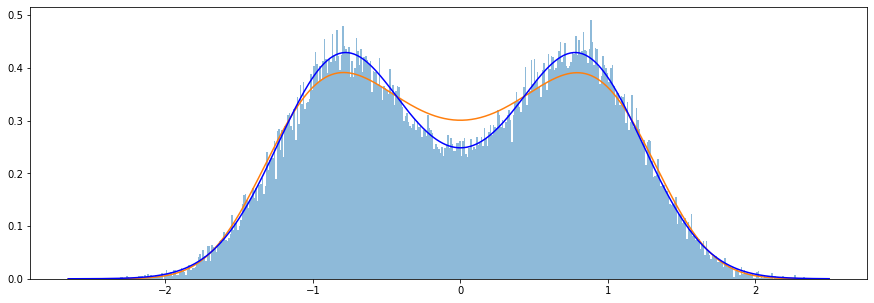

In [41]:
function()

## 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span>

We've plot the variation of the ground state function with variation of the imaginary time propagation in the two case.

In the $\Psi_T(x)=1$ case the immaginary time propagation can be reduced up to 4 without modify how the ground state function.

In the $\Psi_T(x)$ case with our parameters we can reduce the time propagation up to 1 instead, from 0.5 the function start to vary and at values lower than 0.5 it no longer describe our ground state. 

In [10]:
def create_input_file_pigs_pimc(Times, Temp, I_time_p, Equi, isto_bins, tmA, tmB, function, Blocks, Steps, pigs_pimc):
    input_file = 'input_pigs.dat'
    if pigs_pimc:
        input_file = 'input_pimc.dat'
    with open(f"{path_old}/input.dat", 'w') as new_config:
            with open(f'{path_old}/{input_file}', 'r') as template_config:
                config = template_config.read()
                config = re.sub("{timeslices}", str(Times), config)
                config = re.sub("{temperature}", str(Temp), config)
                config = re.sub("{imaginaryTimePropagation}", str(I_time_p), config)
                config = re.sub("{Steps}", str(Steps), config)
                config = re.sub("{equilibration}", str(Equi), config)
                config = re.sub("{Bloks}", str(Blocks), config)
                config = re.sub("{Steps}", str(Steps), config)
                config = re.sub("{h_bins}", str(isto_bins), config)
                config = re.sub("{h_start}", str(-5), config)
                config = re.sub("{h_end}", str(5), config)
                config = re.sub("{t_start}", str(tmA), config)
                config = re.sub("{t_end}", str(tmB), config)
                config = re.sub("{function}", str(function), config)
                new_config.write(config)
def pigs(pigs_pimc):
    t=300
    temp=0.0
    iTP=[0.1,0.2,0.5,1.0,4.0,8.0]                                                                                                                
    MCSTEPS=4000
    equi=2000
    blocks=20                                                                                                         
    h_bins=400
    h_start=-5
    h_end=5
    tA =120
    tB = 180
    plt.rcParams['figure.figsize'] = (15,16)
    fig, axs = plt.subplots(2, sharex=True);
    axs[0].set_title('1D quantum particle, <H_T> evaluation')
    axs[0].set_ylabel('Probability')
   
    axs[1].set_title('1D quantum particle, <H_T> evaluation')
    axs[1].set_ylabel('Probability')
    n = np.loadtxt(f'{path_old}/probability.dat', unpack=True, usecols=(0))  
    for i in range(len(iTP)):
        create_input_file_pigs_pimc(t, temp, iTP[i], equi, h_bins, tA, tB, 0, blocks, MCSTEPS, pigs_pimc)
        subprocess.run(["./qmc1d"], cwd=path_old)
        prob_1,prob_err_1 = np.loadtxt(f'{path_old}/probability.dat', unpack=True, usecols=(1,2))
        axs[0].errorbar(n, prob_1*prob_1, yerr=prob_err_1, marker='.', linestyle='', zorder=10, label=f'probability Psi = 1_{iTP[i]}')
        create_input_file_pigs_pimc(t, temp, iTP[i], equi, h_bins, tA, tB, 1, blocks, MCSTEPS, pigs_pimc)
        subprocess.run(["./qmc1d"], cwd=path_old)
        prob_2,prob_err_2 = np.loadtxt(f'{path_old}/probability.dat', unpack=True, usecols=(1,2))
        axs[1].errorbar(n, prob_2*prob_2, yerr=prob_err_2, marker='.', linestyle='', zorder=10, label=f'probability Psi = Psi_T_{iTP[i]}')
    

    axs[0].legend()
    axs[1].legend()

def pimc(pigs_pimc):
    t=30
    temp=np.arange(30, step=3.0)
    iTP=8.0                                                                                                                 
    MCSTEPS=4000
    equi=2000
    blocks=20                                                                                                         
    h_bins=400
    h_start=-5
    h_end=5
    tA =1
    tB = 29
    plt.rcParams['figure.figsize'] = (15,16)
    fig, axs = plt.subplots(2, sharex=True);
    axs[0].set_title('1D quantum particle, <H_T> evaluation')
    axs[0].set_ylabel('Probability')
   
    axs[1].set_title('1D quantum particle, <H_T> evaluation')
    axs[1].set_ylabel('Probability')
    n = np.loadtxt(f'{path_old}/probability.dat', unpack=True, usecols=(0))

    for i in range(len(temp)):
        create_input_file_pigs_pimc(t, temp[i], iTP, equi, h_bins, tA, tB, 0, blocks, MCSTEPS, pigs_pimc)
        subprocess.run(["./qmc1d"], cwd=path_old)
        prob_1,prob_err_1 = np.loadtxt(f'{path_old}/probability.dat', unpack=True, usecols=(1,2))
        axs[0].errorbar(n, prob_1*prob_1, yerr=prob_err_1, marker='.', linestyle='', zorder=10, label=f'probability Psi = 1_{temp[i]}')
        create_input_file_pigs_pimc(t, temp[i], iTP, equi, h_bins, tA, tB, 1, blocks, MCSTEPS, pigs_pimc)
        subprocess.run(["./qmc1d"], cwd=path_old)
        prob_2,prob_err_2 = np.loadtxt(f'{path_old}/probability.dat', unpack=True, usecols=(1,2))
        axs[1].errorbar(n, prob_2*prob_2, yerr=prob_err_2, marker='.', linestyle='', zorder=10, label=f'probability Psi = Psi_T_{temp[i]}')
    

    axs[0].legend()
    axs[1].legend()





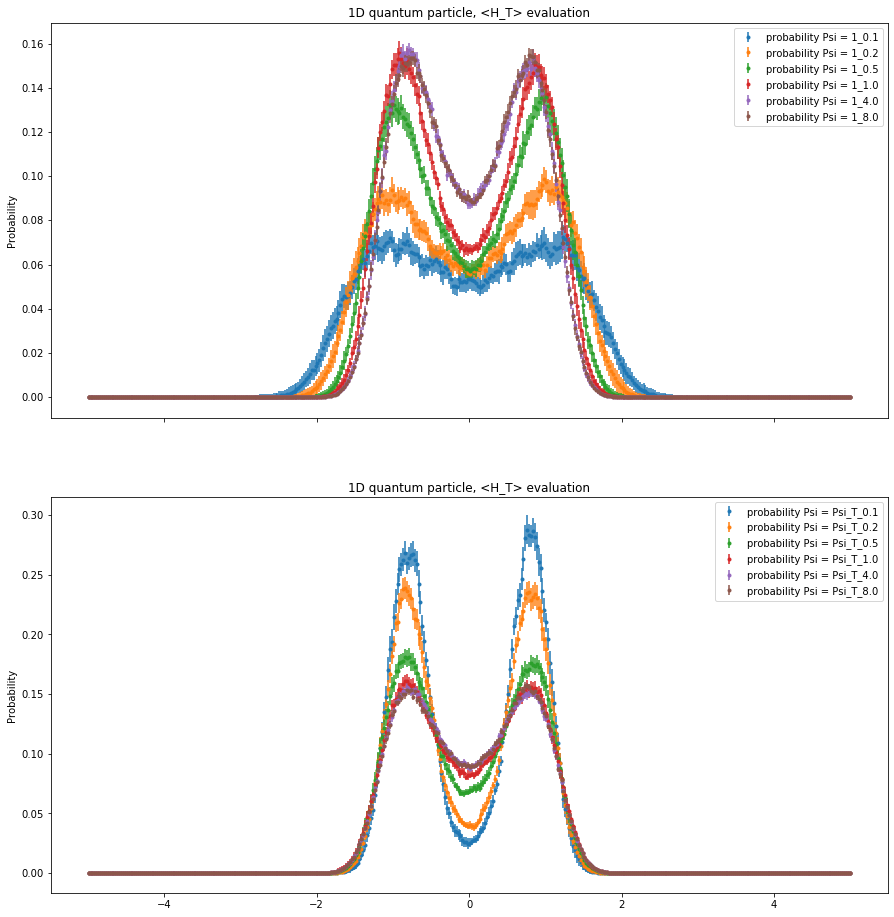

In [11]:
pigs(False)

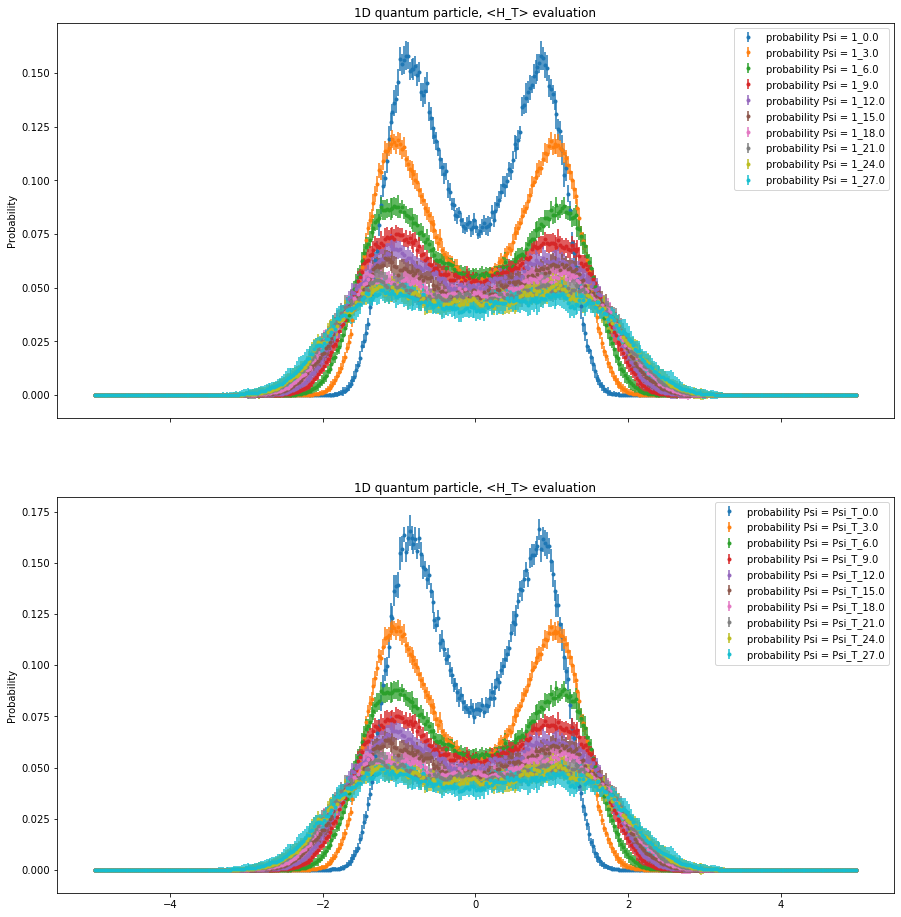

In [12]:
pimc(True)